In [3]:
import statistics as st
import numpy as my_np
from collections import Counter

data = [1, 2, 2, 3, 4, 4, 4, 5]

print('Mean: ', st.mean(data))
print('Median:', st.median(data))
print('Mode: ', st.mode(data))

def my_mean(data):
    return sum(data)/len(data)

def my_median(data):
    return data[(len(x)//2)-1]

def my_mode_one(data):
    data_set = set(data)
    max_dict = dict()
    for i in data_set:
        max_dict[i] = 0
    for i in data_set:
        for j in data:
            if i == j:
                max_dict[i] += 1
    mode_list = []
    maxV = max(max_dict.values())
    for k, val in max_dict.items():
        if val ==maxV:
            mode_list.append(k)
    return mode_list

def my_mode_two(data):
    """return a list, might be more than one mode"""
    counts = Counter(data)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

print(st.mode(data), my_mode_one(data), my_mode_two(data))

Mean:  3.125
Median: 3.5
Mode:  4
4 [4] [4]


In [4]:
print(my_mode_two(data))

[4]


In [5]:
my_dict = {'a':10, 'b':20, 'c':15}
print('value for key "a" is: ', my_dict['a'])

#adding a new key-value pari to the dictionary
my_dict['d'] = 25
print('Updated dictionaryd:', my_dict)
#Updating a value in a dictionary
my_dict['a'] = 33
print('Dictionary after value updated is: ', my_dict)

value for key "a" is:  10
Updated dictionaryd: {'a': 10, 'b': 20, 'c': 15, 'd': 25}
Dictionary after value updated is:  {'a': 33, 'b': 20, 'c': 15, 'd': 25}


In [6]:
ds = [1, 2, 2, 3, 4, 4, 4, 5, 6]
def my_var(data):
    dm = my_mean(data)
    length = len(data)
    return sum([(x_i - dm)**2 for x_i in data])/(length-1)

def my_std(data):
    return my_np.sqrt(my_var(data))

print(st.variance(ds), my_var(data), my_np.var(ds))
print(st.stdev(ds), my_std(ds))


2.5277777777777777 1.8392857142857142 2.2469135802469133
1.5898986690282428 1.5898986690282426


In [7]:
def my_quantile(x, p): #p is the float point number that is less than 1.0, x is the list
    x_idx = int(p*len(x))
    return sorted(x)[x_idx]

print(my_quantile(ds, 0.3), my_quantile(ds, 0.75), my_np.quantile(ds, 0.75))


2 4 4.0


In [8]:
#adding co-variance
def my_cov(X, Y):
    xv = my_np.array([(x-my_mean(X)) for x in X])
    yv = my_np.array([(y-my_mean(Y)) for y in Y])
    return my_np.dot(xv, yv)/(len(X)-1)

X =[i for i in range(0, 10)] #, 1)]
Y =[j for j in range(11, 21)] #, 1)]

print(len(X), print(len(Y)))

print('my cov: \n', my_cov(X, Y), '\n')
print('np cov: \n', my_np.cov(X, Y))

r = my_cov(X, Y)/(my_std(X)*my_std(Y))
print('The correlation is {:.3f}'.format(r))



10
10 None
my cov: 
 9.166666666666666 

np cov: 
 [[9.16666667 9.16666667]
 [9.16666667 9.16666667]]
The correlation is 1.000


Correlation matrix:
 [[1.         0.99437707]
 [0.99437707 1.        ]]


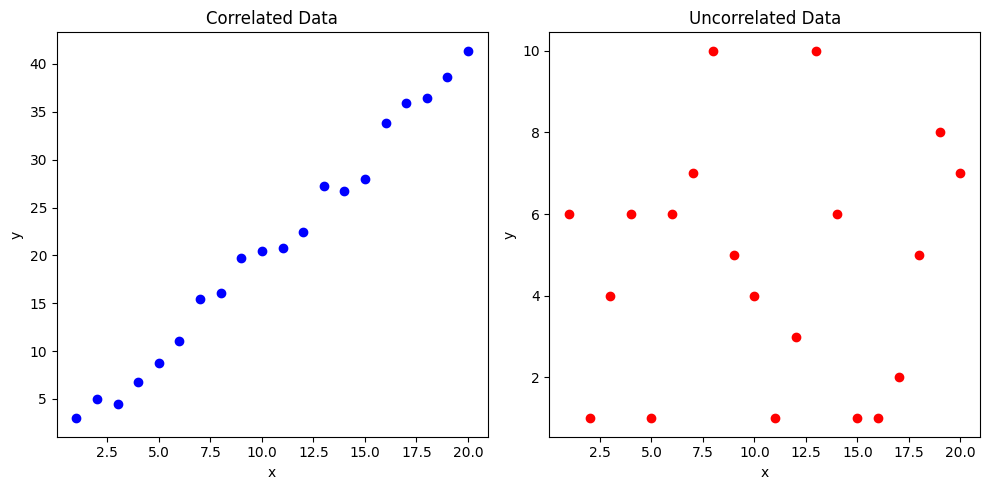

In [9]:
import random
import matplotlib.pyplot as plt

x = list(range(1, 21))  # Generate a longer list for x
y = [2 * xi + random.uniform(-2, 2) for xi in x]  # Generate correlated values for y
correlation = my_np.corrcoef(x, y)
print("Correlation matrix:\n", correlation)

# Plot correlated data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.title("Correlated Data")
plt.xlabel("x")
plt.ylabel("y")

# Generate uncorrelated data
y_uncorrelated = [random.randint(1, 10) for _ in x]

plt.subplot(1, 2, 2)
plt.scatter(x, y_uncorrelated, color='red')
plt.title("Uncorrelated Data")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()